Klik Ctrl + F9 untuk RUN ALL

dataset didapatkan Di 
sumber : DQlab.com

In [ ]:
!wget -O file_excel.xlsx https://docs.google.com/uc?id=1zbDK-_wm7p-A-SOyPEOe2qDWBviwJHyq&export=download

--2021-08-17 14:13:38--  https://docs.google.com/uc?id=1zbDK-_wm7p-A-SOyPEOe2qDWBviwJHyq
Resolving docs.google.com (docs.google.com)... 173.194.218.100, 173.194.218.113, 173.194.218.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.218.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v38bpg9tar9hd4lq6tkc3be41mmhmh3l/1629209550000/13351450258384512919/*/1zbDK-_wm7p-A-SOyPEOe2qDWBviwJHyq [following]
--2021-08-17 14:13:38--  https://doc-0k-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/v38bpg9tar9hd4lq6tkc3be41mmhmh3l/1629209550000/13351450258384512919/*/1zbDK-_wm7p-A-SOyPEOe2qDWBviwJHyq
Resolving doc-0k-4s-docs.googleusercontent.com (doc-0k-4s-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to doc-0k-4s-docs.googleusercontent.com (doc-0k-4s-docs.googleusercontent.com)|173.19

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/file_excel.xlsx', index_col="kode_kontrak")
df.head()

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
kode_kontrak,,,,,,
AGR-000001,295,YA,48,5,61 - 90 days,4
AGR-000011,271,YA,36,5,61 - 90 days,4
AGR-000030,159,TIDAK,12,0,0 - 30 days,1
AGR-000043,210,YA,12,3,46 - 60 days,3
AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
# Mengecek apakah ada NULL didalam data tersebut
print(df.shape)
df.info()

(900, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, AGR-000001 to AGR-010790
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pendapatan_setahun_juta  900 non-null    int64 
 1   kpr_aktif                900 non-null    object
 2   durasi_pinjaman_bulan    900 non-null    int64 
 3   jumlah_tanggungan        900 non-null    int64 
 4   rata_rata_overdue        900 non-null    object
 5   risk_rating              900 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 49.2+ KB


### Cek Apakah anda duplikasi pada row

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

# Ternyata ada 65 duplikat di baris tersebut yaa

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, AGR-000001 to AGR-010790
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   pendapatan_setahun_juta  835 non-null    int64 
 1   kpr_aktif                835 non-null    object
 2   durasi_pinjaman_bulan    835 non-null    int64 
 3   jumlah_tanggungan        835 non-null    int64 
 4   rata_rata_overdue        835 non-null    object
 5   risk_rating              835 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 45.7+ KB


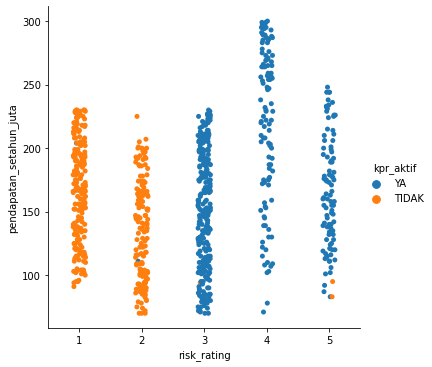

In [ ]:
sns.catplot(x="risk_rating", y="pendapatan_setahun_juta",hue="kpr_aktif" ,data=df,kind="strip")

Disimpulkan Bahwa kpr_aktif itu indikator sangat kuat dalam risk_rating

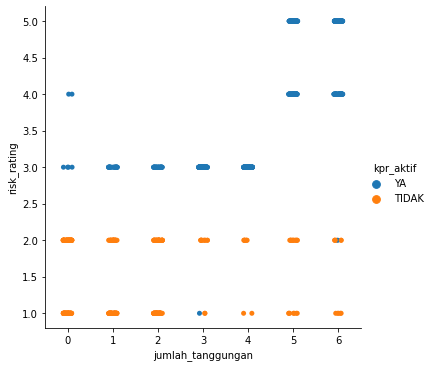

In [ ]:
sns.catplot(y="risk_rating", x="jumlah_tanggungan",hue="kpr_aktif" ,data=df,kind="strip")

## mengubah categorical variable menjadi numeric

In [ ]:
df['kpr_aktif'].value_counts()

YA       471
TIDAK    364
Name: kpr_aktif, dtype: int64

In [ ]:
df.replace({'kpr_aktif':{'YA':1,'TIDAK':0}},inplace=True)

In [ ]:
df.head()

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
kode_kontrak,,,,,,
AGR-000001,295,1,48,5,61 - 90 days,4
AGR-000011,271,1,36,5,61 - 90 days,4
AGR-000030,159,0,12,0,0 - 30 days,1
AGR-000043,210,1,12,3,46 - 60 days,3
AGR-000049,165,0,36,0,31 - 45 days,2


In [ ]:
# dokumentasinya https://www.py4u.net/discuss/215386

display(df['rata_rata_overdue'].value_counts())
print()
display(df['rata_rata_overdue'].unique())
df['rata_rata_overdue'] = pd.Categorical(df['rata_rata_overdue'], 
               categories=['0 - 30 days','31 - 45 days','46 - 60 days',
                           '61 - 90 days','> 90 days'],
               ordered=True)

46 - 60 days    263
0 - 30 days     209
31 - 45 days    154
61 - 90 days    112
> 90 days        97
Name: rata_rata_overdue, dtype: int64

array(['61 - 90 days', '0 - 30 days', '46 - 60 days', '31 - 45 days',
       '> 90 days'], dtype=object)

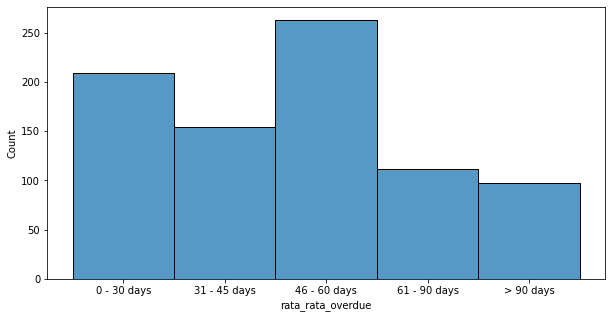

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(ax=ax,x="rata_rata_overdue",data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, AGR-000001 to AGR-010790
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   pendapatan_setahun_juta  835 non-null    int64   
 1   kpr_aktif                835 non-null    int64   
 2   durasi_pinjaman_bulan    835 non-null    int64   
 3   jumlah_tanggungan        835 non-null    int64   
 4   rata_rata_overdue        835 non-null    category
 5   risk_rating              835 non-null    int64   
dtypes: category(1), int64(5)
memory usage: 80.2+ KB


In [ ]:
df.replace({'rata_rata_overdue':{
    '0 - 30 days' : 0,
    '31 - 45 days' : 1 ,
    '46 - 60 days' : 2,
    '61 - 90 days' : 3,
    '> 90 days' : 4
}},inplace=True)

In [ ]:
df.head(10)

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
kode_kontrak,,,,,,
AGR-000001,295,1,48,5,3,4
AGR-000011,271,1,36,5,3,4
AGR-000030,159,0,12,0,0,1
AGR-000043,210,1,12,3,2,3
AGR-000049,165,0,36,0,1,2
AGR-000063,220,0,24,5,0,1
AGR-000068,70,0,36,3,1,2
AGR-000075,88,0,48,3,1,2
AGR-000081,163,0,48,5,1,2


## Feature Engineering

In [ ]:
df['pendapatan_setahun_juta'] = df['pendapatan_setahun_juta'] / (df['jumlah_tanggungan'] + 1)
df.drop(columns=["jumlah_tanggungan"], inplace=True)
df.head()

,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,rata_rata_overdue,risk_rating
kode_kontrak,,,,,
AGR-000001,49.166667,1,48,3,4
AGR-000011,45.166667,1,36,3,4
AGR-000030,159.000000,0,12,0,1
AGR-000043,52.500000,1,12,2,3
AGR-000049,165.000000,0,36,1,2


## Pemodelan Machine learning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df.iloc[:,:(len(df.columns)-1)]
y = df.iloc[:,(len(df.columns)-1):]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 42)

y.head()

,risk_rating
kode_kontrak,
AGR-000001,4
AGR-000011,4
AGR-000030,1
AGR-000043,3
AGR-000049,2


In [ ]:
KNNku = KNeighborsClassifier()
KNNku.fit(X_train, y_train)
y_prediksiku = KNNku.predict(X_test)

print("DENGAN menggunakan KNN")
print(classification_report(y_test,y_prediksiku))

DENGAN menggunakan KNN
              precision    recall  f1-score   support

           1       0.71      0.68      0.69        80
           2       0.46      0.43      0.44        54
           3       0.54      0.75      0.63        77
           4       0.60      0.32      0.41        38
           5       0.74      0.63      0.68        27

    accuracy                           0.59       276
   macro avg       0.61      0.56      0.57       276
weighted avg       0.60      0.59      0.59       276



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
pohonku = RandomForestClassifier(random_state=42)
pohonku.fit(X_train, y_train)
y_prediksiku = pohonku.predict(X_test)

print("DENGAN menggunakan RandomForestClassifier")
print(classification_report(y_test,y_prediksiku))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


DENGAN menggunakan RandomForestClassifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        27

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



In [ ]:
from sklearn.tree import plot_tree
len(pohonku.estimators_)

100

[Text(623.6470588235294, 747.4499999999999, 'pendapatan_setahun_juta <= 54.333\ngini = 0.765\nsamples = 361\nvalue = [129, 97, 194, 76, 63]\nclass = 3'),
 Text(459.52941176470586, 611.55, 'rata_rata_overdue <= 2.5\ngini = 0.705\nsamples = 219\nvalue = [12, 44, 157, 75, 63]\nclass = 3'),
 Text(328.235294117647, 475.65, 'rata_rata_overdue <= 1.5\ngini = 0.411\nsamples = 134\nvalue = [12, 44, 157, 0, 0]\nclass = 3'),
 Text(262.5882352941176, 339.74999999999994, 'kpr_aktif <= 0.5\ngini = 0.337\nsamples = 37\nvalue = [12, 44, 0, 0, 0]\nclass = 2'),
 Text(131.2941176470588, 203.8499999999999, 'rata_rata_overdue <= 0.5\ngini = 0.311\nsamples = 35\nvalue = [10, 42, 0, 0, 0]\nclass = 2'),
 Text(65.6470588235294, 67.94999999999993, 'gini = 0.0\nsamples = 6\nvalue = [10, 0, 0, 0, 0]\nclass = 1'),
 Text(196.94117647058823, 67.94999999999993, 'gini = 0.0\nsamples = 29\nvalue = [0, 42, 0, 0, 0]\nclass = 2'),
 Text(393.88235294117646, 203.8499999999999, 'durasi_pinjaman_bulan <= 42.0\ngini = 0.5\nsam

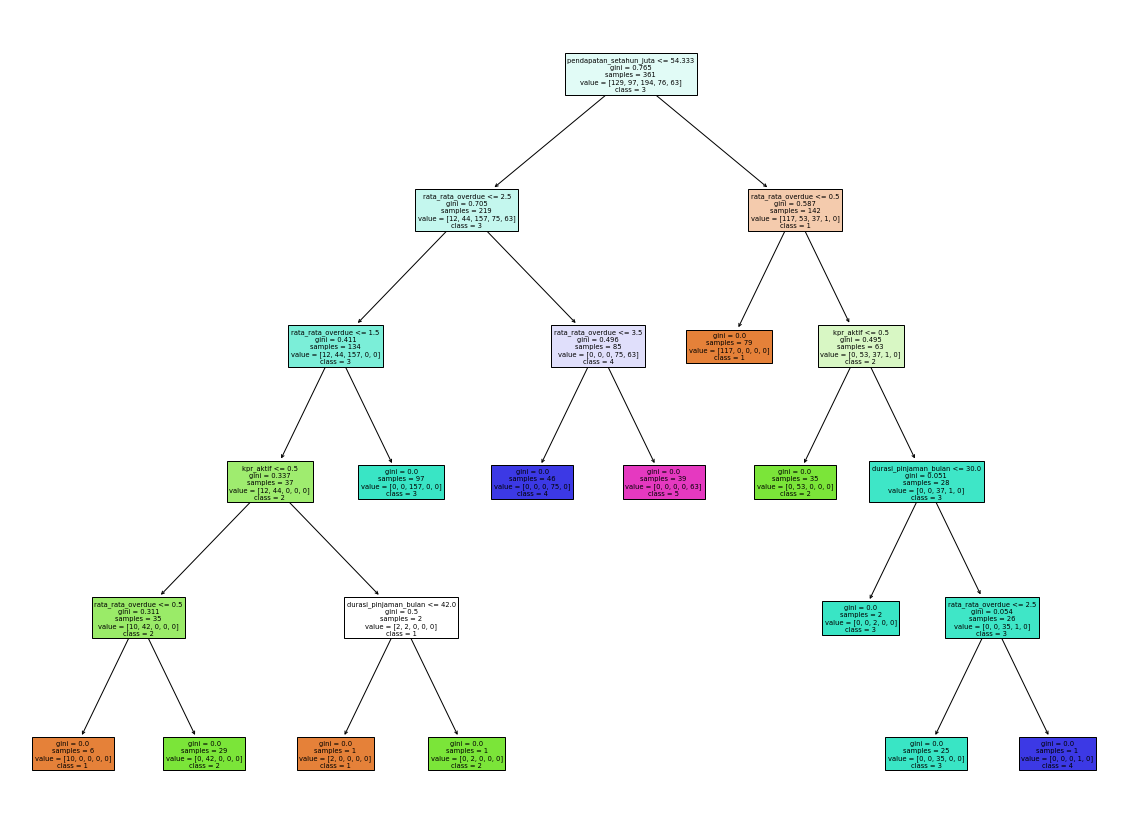

In [ ]:
plt.figure(figsize=(20,15))
urutan = sorted(y['risk_rating'].unique())
urutan = [str(i) for i in urutan]
plot_tree(pohonku.estimators_[99],
          feature_names=X.columns,
          class_names=urutan,
          filled=True)